# 信息论

## 自信息（self-information)

一个事件$X=x$的自信息为：$$I(x)=-logP(x)$$

概念解析：
- 一个事件的自信息，表示一个随机变量$X$，其取值等于$x$时的信息量
- 信息论建立在对信息的量化之上
- 信息的量化的基本想法是：
    - 越不可能发生的事件的信息量越高 $\tag{1}$
    - 独立事件应该具备增量的信息 $\tag{2}$
- (1)体现在$I(z)=-logz$上，由于$z=P(x) \in [0,1]$，其函数为:

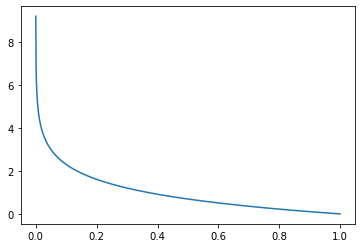

In [6]:
import numpy as np
import matplotlib.pyplot as plt
z = np.linspace(0.0001,0.9999,1000)
I = -np.log(z)
plt.plot(z,I)

- (2)体现在：$-logP(x1)P(x2) = - (logP(x1) + logP(x2))$
- 该定义是离散随机变量表示的事件的自信息，而不是连续随机变量
- 基础概念包括随机变量、事件、概率，见"概率论"

## 香农熵 (shannon entropy)

随机变量$X$的香农熵的定义：$$H(X)=E_{X\sim P}[I(x)]=-E_{X\sim P}[logP(x)]$$

概念解析:
- 意义: 香农熵衡量整个随机变量的信息量（也即不确定性），而不是随机变量的某个取值
- $E_{X\sim P}$是数学期望，见"概率论"

## 相对熵 (relative entropy)

随机变量的两个分布的相对熵，也称KL散度(Kullback-Leibler divergence)，定义：$$D_{KL}(P||Q)=E_{X \sim P}[log\frac{P(x)}{Q(x)}]$$

概念解析:
- 可以证明其值大于等于0，证明见：https://developer.aliyun.com/article/288604
- 物理意义是：信息量的差，一个随机变量的Q分布相对P的信息差
- 越接近0信息差越小

## 交叉熵 (cross entropy)

随机变量的两个分布的交叉熵，定义：$$H(P,Q)=-E_{X\sim P}logQ(x)$$

概念解析：
- $D_{KL}(P||Q) + H(P) =  H(P,Q)$，针对$Q$最小化$D_{KL}$，等价于最小化$H(P,Q)$，因此，最小化交叉熵，就是针对分布$Q$最小化其于真实分布$P$之间的信息差

## 机器学习中使用交叉熵



- loss function: $Loss(y, \hat{y}) = H(y||\hat{y}) $，针对$\hat{y}$求$Loss$的最小化，即求$H$也即求$D_{KL}$的最小化。
- $\hat{y} = [y1, y2, ..., yn]$，将这里的yi解释为取第i个值的概率，则$\hat{y}$就变成一个离散随机变量的分布，而y是真实分布，从而求两个分布的差距，最小化之。
- 二分类：$Loss(y, \hat{y}) = -ylog\hat{y} - (1-y)log(1-\hat{y})$, 这里$y$和$1-y$分别是取一个分类和另一个分类的概率
- 多分类：$Loss(y, \hat{y}) = \sum_{i}{-y_{i}log\hat{y}_{i}}$，这里$y_{i}$是取分类$i$的概率